In [ ]:
conda create -n env_pytorch python=3.6

In [ ]:
conda activate env_pytorch

In [ ]:
pip install torch

In [1]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
import seaborn as sns
import keras
from sklearn import linear_model
#import torch 
import os
import numpy as np
import pandas as pd
import tqdm as tqdm
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
import matplotlib as rc
from sklearn.preprocessing import MinMaxScaler
from pandas.plotting import register_matplotlib_converters
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


In [77]:
df= pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

In [78]:
df.head(10)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,30451,30616,30967,31238,31517,31836,32022,32324,32672,32951
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,2269,2330,2402,2466,2535,2580,2662,2752,2819,2893
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,12685,12968,13273,13571,13907,14272,14657,15070,15500,15941
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,855,855,855,855,855,855,855,855,855,855
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,212,259,267,276,284,291,315,328,346,346
5,NaN,Antigua and Barbuda,17.0608,-61.7964,0,0,0,0,0,0,...,65,65,69,69,69,69,69,68,68,68
6,NaN,Argentina,-38.4161,-63.6167,0,0,0,0,0,0,...,55343,57744,59933,62268,64530,67197,69941,72786,75376,77815
7,NaN,Armenia,40.0691,45.0382,0,0,0,0,0,0,...,23247,23909,24645,25127,25542,26065,26658,27320,27900,28606
8,Australian Capital Territory,Australia,-35.4735,149.0124,0,0,0,0,0,0,...,108,108,108,108,108,108,108,108,108,108
9,New South Wales,Australia,-33.8688,151.2093,0,0,0,0,3,4,...,3174,3177,3184,3189,3203,3211,3211,3405,3419,3429


In [100]:
df2= df[df['Country/Region']=='India'].drop(['Province/State'], axis=1)
df2

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20
131,India,21.0,78.0,0,0,0,0,0,0,0,...,508953,528859,548318,566840,585481,604641,625544,648315,673165,697413


In [81]:
df1=df.groupby(['Country/Region']).sum()
df1

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,33.000000,65.000000,0,0,0,0,0,0,0,0,...,30451,30616,30967,31238,31517,31836,32022,32324,32672,32951
Albania,41.153300,20.168300,0,0,0,0,0,0,0,0,...,2269,2330,2402,2466,2535,2580,2662,2752,2819,2893
Algeria,28.033900,1.659600,0,0,0,0,0,0,0,0,...,12685,12968,13273,13571,13907,14272,14657,15070,15500,15941
Andorra,42.506300,1.521800,0,0,0,0,0,0,0,0,...,855,855,855,855,855,855,855,855,855,855
Angola,-11.202700,17.873900,0,0,0,0,0,0,0,0,...,212,259,267,276,284,291,315,328,346,346
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,0,0,...,1557,1815,1990,2185,2428,2758,3080,3334,3835,4277
Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,0,0,...,10,10,10,10,10,10,10,10,10,10
Yemen,15.552727,48.516388,0,0,0,0,0,0,0,0,...,1089,1103,1118,1128,1158,1190,1221,1240,1248,1265


In [102]:
index=df2.index
print("The shape of the df is", df.shape)
print("the shape of the df1",df2.shape)

The shape of the df is (266, 170)
the shape of the df1 (1, 169)


In [106]:
# we Dont need first two columns
df2=df2.iloc[:,2:]
df2.head()

,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,...,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20
131,0,0,0,0,0,0,0,1,1,1,...,508953,528859,548318,566840,585481,604641,625544,648315,673165,697413


In [107]:
# checking to see if there are null values
df2.isnull().sum().any()

False

In [18]:
#confirmed_table = df.melt(id_vars=["Province/State", "Country/Region", "Lat", "Long"], var_name="Date", value_name="Confirmed").fillna('').drop(['Lat', 'Long'], axis=1)

In [21]:
#df3= confirmed_table[confirmed_table['Country/Region']=='India']
#df3

,Province/State,Country/Region,Date,Confirmed
131,,India,1/22/20,0
397,,India,1/23/20,0
663,,India,1/24/20,0
929,,India,1/25/20,0
1195,,India,1/26/20,0
...,...,...,...,...
42957,,India,7/1/20,604641
43223,,India,7/2/20,625544
43489,,India,7/3/20,648315
43755,,India,7/4/20,673165


In [108]:
daily_confirmed_cases = df2.sum(axis=0)
daily_confirmed_cases

1/23/20         0
1/24/20         0
1/25/20         0
1/26/20         0
1/27/20         0
            ...  
7/1/20     604641
7/2/20     625544
7/3/20     648315
7/4/20     673165
7/5/20     697413
Length: 165, dtype: int64

In [43]:
#daily_confirmed_cases.drop(['Province/State', 'Country/Region'], inplace= True)

In [109]:
daily_confirmed_cases.index

Index(['1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20',
       '1/29/20', '1/30/20', '1/31/20', '2/1/20',
       ...
       '6/26/20', '6/27/20', '6/28/20', '6/29/20', '6/30/20', '7/1/20',
       '7/2/20', '7/3/20', '7/4/20', '7/5/20'],
      dtype='object', length=165)

In [110]:
daily_confirmed_cases.index = pd.to_datetime(daily_confirmed_cases.index)

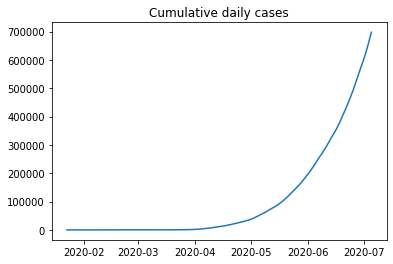

In [111]:
plt.plot(daily_confirmed_cases)
plt.title("Cumulative daily cases");

In [112]:
new_cases = daily_confirmed_cases.diff().dropna().astype(np.int64)
new_cases

2020-01-24        0
2020-01-25        0
2020-01-26        0
2020-01-27        0
2020-01-28        0
              ...  
2020-07-01    19160
2020-07-02    20903
2020-07-03    22771
2020-07-04    24850
2020-07-05    24248
Length: 164, dtype: int64

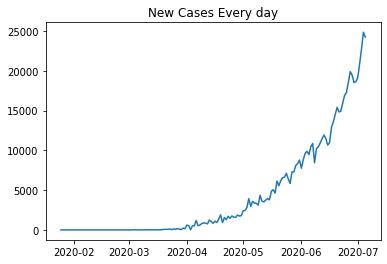

In [113]:
plt.plot(new_cases[1:])
plt.title("New Cases Every day");

In [114]:
def train_test_split(new_cases, pct):
    In_n=int(np.ceil(pct*len(new_cases)))
    X_train=new_cases[:In_n+1]
    X_test=new_cases[In_n:]
    return X_train, X_test
 
pct=0.75
train_data,test_data = train_test_split(new_cases, pct)

(124,)


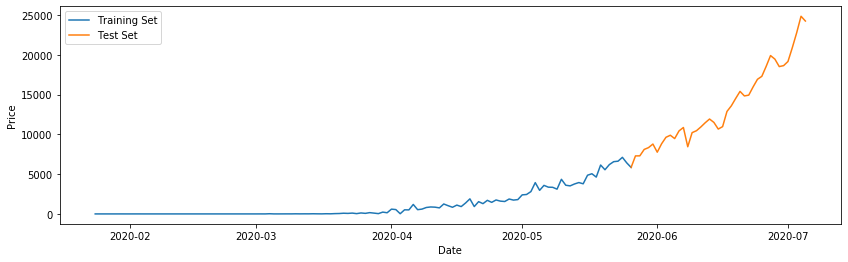

In [115]:
print(train_data.shape)

plt.figure(figsize=(14,4))
plt.plot(train_data)
plt.plot(test_data)
plt.ylabel("Price")
plt.xlabel("Date")
plt.legend(["Training Set", "Test Set"])

In [116]:
scaler = MinMaxScaler()
scaler = scaler.fit((np.array(train_data)).reshape(-1,1))
train_data = scaler.transform((np.array(train_data)).reshape(-1,1))
test_data = scaler.transform((np.array(test_data)).reshape(-1,1))

In [117]:
X_train = []
y_train = []

lengthTr = len(train_data)
timeStamp=10
for i in range(timeStamp,lengthTr):
    X_train.append(train_data[i-timeStamp:i])
    y_train.append(train_data[i])

X_train=np.array(X_train)
y_train=np.array(y_train)


X_test = []
y_test = [] 

lengthTe = len(test_data)
for i in range(timeStamp, lengthTe):
    X_test.append(test_data[i-timeStamp:i])
    y_test.append(test_data[i])

X_test=np.array(X_test)
y_test=np.array(y_test)

In [118]:
X_test.shape

(31, 10, 1)

In [119]:
print("Figure below depict how we generate X_train and y_train")
print("timeStamp=5")
#from IPython.display import Image
#Image("C://Users//bidar20m//Desktop//ax.jpg")

Figure below depict how we generate X_train and y_train
timeStamp=5


In [120]:
X_train.shape

(114, 10, 1)

In [121]:
# Sample of Sequence 
X_train[0], y_train[0]

(array([[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.00014059],
        [0.        ],
        [0.        ],
        [0.00014059]]),
 array([0.00014059]))

In [122]:
model = Sequential([
                    keras.layers.LSTM(units=30, return_sequences=True, input_shape=(X_train.shape[1],1)),
                    Dropout(0.4),

                    keras.layers.LSTM(units=20, return_sequences=True),
                    Dropout(0.4),

                    keras.layers.LSTM(units=20, return_sequences=True),
                    Dropout(0.4),

                    keras.layers.LSTM(units=20),
                    Dropout(0.4),

                    keras.layers.Dense(units=1),
                   ])
model.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 10, 30)            3840      
_________________________________________________________________
dropout_9 (Dropout)          (None, 10, 30)            0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 10, 20)            4080      
_________________________________________________________________
dropout_10 (Dropout)         (None, 10, 20)            0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 10, 20)            3280      
_________________________________________________________________
dropout_11 (Dropout)         (None, 10, 20)            0         
_________________________________________________________________
lstm_8 (LSTM)                (None, 20)               

In [123]:
model.compile(optimizer='rmsprop', loss='mean_squared_error', metrics=['mean_squared_error'])

In [124]:
model.fit(X_train, y_train, epochs=50, batch_size=200)

Epoch 1/50
114/114 [==============================] - 2s 20ms/step - loss: 0.1078 - mean_squared_error: 0.1078
Epoch 2/50
114/114 [==============================] - 0s 421us/step - loss: 0.0922 - mean_squared_error: 0.0922
Epoch 3/50
114/114 [==============================] - 0s 421us/step - loss: 0.0804 - mean_squared_error: 0.0804
Epoch 4/50
114/114 [==============================] - 0s 421us/step - loss: 0.0758 - mean_squared_error: 0.0758
Epoch 5/50
114/114 [==============================] - 0s 421us/step - loss: 0.0669 - mean_squared_error: 0.0669
Epoch 6/50
114/114 [==============================] - 0s 374us/step - loss: 0.0642 - mean_squared_error: 0.0642
Epoch 7/50
114/114 [==============================] - 0s 421us/step - loss: 0.0532 - mean_squared_error: 0.0532
Epoch 8/50
114/114 [==============================] - 0s 421us/step - loss: 0.0494 - mean_squared_error: 0.0494
Epoch 9/50
114/114 [==============================] - 0s 421us/step - loss: 0.0455 - mean_squared_error: 

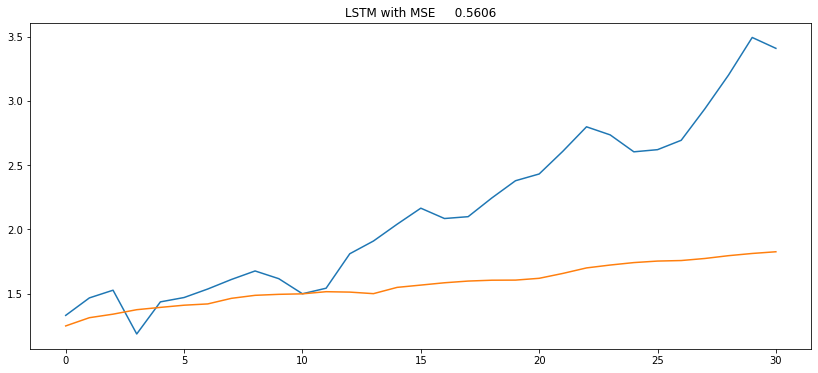

In [125]:
pred_result = {}

y_true = (y_test)
y_pred = (model.predict(X_test))
MSE = mean_squared_error(y_true, y_pred)
pred_result= {}
pred_result["True"] = y_true
pred_result["Pred"] = y_pred

plt.figure(figsize=(14,6))
plt.title("LSTM with MSE {:10.4f}".format(MSE))
plt.plot(y_true)
plt.plot(y_pred)

In [126]:
model_GRU= Sequential([
                keras.layers.GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'),
                Dropout(0.2),

                keras.layers.GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'),
                Dropout(0.2),

                keras.layers.GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'),
                Dropout(0.2),

                keras.layers.GRU(units=50, activation='tanh'),
                Dropout(0.2),

                keras.layers.Dense(units=1)])



model_GRU.compile(optimizer=SGD(lr=0.01, decay=1e-7, momentum=0.9, nesterov=False),loss='mean_squared_error')

model_GRU.fit(X_train, y_train,epochs=50,batch_size=150)

Epoch 1/50
114/114 [==============================] - 3s 23ms/step - loss: 0.1215
Epoch 2/50
114/114 [==============================] - 0s 619us/step - loss: 0.1155
Epoch 3/50
114/114 [==============================] - 0s 556us/step - loss: 0.0997
Epoch 4/50
114/114 [==============================] - 0s 564us/step - loss: 0.0847
Epoch 5/50
114/114 [==============================] - 0s 528us/step - loss: 0.0798
Epoch 6/50
114/114 [==============================] - 0s 561us/step - loss: 0.0833
Epoch 7/50
114/114 [==============================] - 0s 542us/step - loss: 0.0875
Epoch 8/50
114/114 [==============================] - 0s 561us/step - loss: 0.0896
Epoch 9/50
114/114 [==============================] - 0s 561us/step - loss: 0.0909
Epoch 10/50
114/114 [==============================] - 0s 561us/step - loss: 0.0858
Epoch 11/50
114/114 [==============================] - 0s 561us/step - loss: 0.0809
Epoch 12/50
114/114 [==============================] - 0s 460us/step - loss: 0.0727
Ep

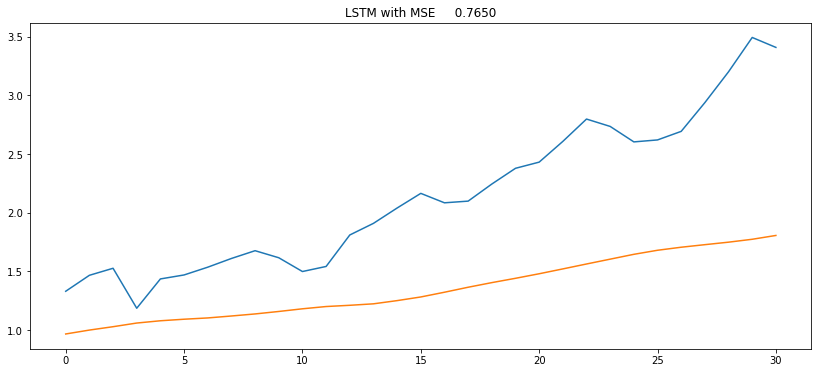

In [127]:
pred_result = {}

y_true = (y_test.reshape(-1,1))
y_pred = (model_GRU.predict(X_test))
MSE = mean_squared_error(y_true, y_pred)
pred_result= {}
pred_result["True"] = y_true
pred_result["Pred"] = y_pred

plt.figure(figsize=(14,6))
plt.title("LSTM with MSE {:10.4f}".format(MSE))
plt.plot(y_true)
plt.plot(y_pred)

In [128]:
nsamples, nx, ny = X_train.shape
d2_X_train= X_train.reshape((nsamples,nx*ny))

nsamples, nx, ny = X_test.shape
d2_X_test= X_test.reshape((nsamples,nx*ny))

In [129]:

d2_X_train.shape

(114, 10)

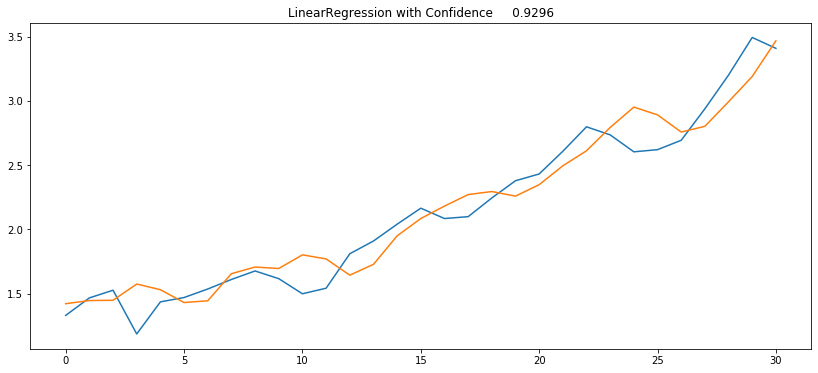

In [130]:
model=LinearRegression(n_jobs=-2)
name="LinearRegression"
model.fit(d2_X_train, y_train)
confidence = model.score(d2_X_test, y_test)
Close= (y_test.reshape(-1,1))
pred_close = (model.predict(d2_X_test))
plt.figure(figsize=(14,6))
plt.title("{} with Confidence {:10.4f}".format(name, confidence))

plt.plot(Close)
plt.plot(pred_close)

In [131]:
df1=df.groupby(['Country/Region']).sum()

In [132]:
# we Dont need first two columns
df1=df1.iloc[:,2:]
df1.head()
daily_confirmed_cases = df1.sum(axis=0)
daily_confirmed_cases.index = pd.to_datetime(daily_confirmed_cases.index)

In [133]:
new_cases = daily_confirmed_cases.diff().dropna().astype(np.int64)

def train_test_split(new_cases, pct):
    In_n=int(np.ceil(pct*len(new_cases)))
    X_train=new_cases[:In_n+1]
    X_test=new_cases[In_n:]
    return X_train, X_test
 
pct=0.75
train_data,test_data = train_test_split(new_cases, pct)

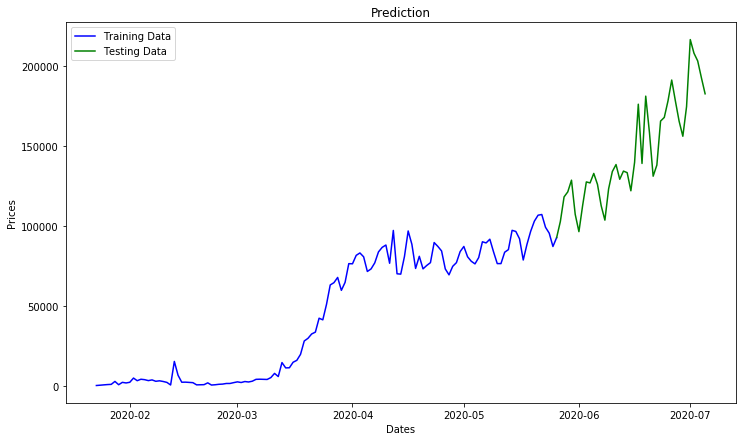

In [137]:
#train_data, test_data = df[0:int(len(df)*0.8)], df[int(len(df)*0.8):]
plt.figure(figsize=(12,7))
plt.title('Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(train_data, 'blue', label='Training Data')
plt.plot(test_data, 'green', label='Testing Data')

plt.legend()

In [135]:
train_ar = train_data
test_ar = test_data
history = [x for x in train_ar]
print(type(history))
predictions = list()
for t in range(len(test_ar)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_ar[t]
    history.append(obs)
error = mean_squared_error(test_ar, predictions)

<class 'list'>


Text(0, 0.5, 'New cases')

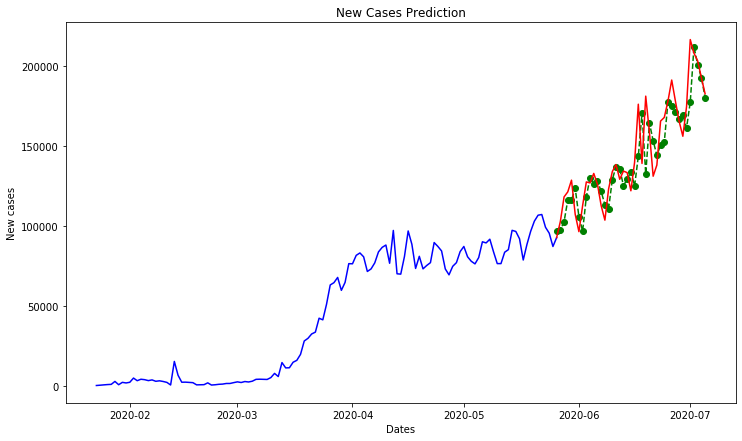

In [136]:
plt.figure(figsize=(12,7))
plt.plot(train_data, 'green', color='blue', label='Training Data')
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed',label='Predicted Values')
plt.plot(test_data.index, test_data, color='red', label='Actual Values')
plt.title('New Cases Prediction')
plt.xlabel('Dates')
plt.ylabel('New cases')